<center><h2> <b>Technical Task</b> - Predictive Analysis 1.0 (Module 5)

# A. Objectives
In this task, we would like you to do exploratory data analysis (EDA) using. Data processing and visualization should be done using Python

# B. Instructions
Using Cancer dataset from sklearn library, do this following task:

1. k-Means Clustering towards the dataset
2. k-Means Clustering for n Principal Components
3. Evaluate the quality of both clusters by using Adjusted Rand Index (ARI).

Please also mention/show your time computation (hint: use %%timeit in the top of the cell)

In [1]:
import time # program to compute the time of execution of any python code
start = time.time() # we initialize the variable start to store the starting time of execution of program

<h3>Data Set Characteristics

In [2]:
from sklearn.datasets import load_breast_cancer
data_cancer = load_breast_cancer()
print(data_cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

<h3>Display Top 5 Rows of The Dataset

In [3]:
import pandas as pd

data = pd.DataFrame(data_cancer.data, columns=data_cancer.feature_names)
data["diagnosis"] = data_cancer.target
data.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


<h3>Exploratory Data: Understanding Data with Statistics

In [4]:
print("data shape:", data.shape)
data.info()

data shape: (569, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoo

<h4>> Descriptive Statistics

In [5]:
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<h4>> Correlation

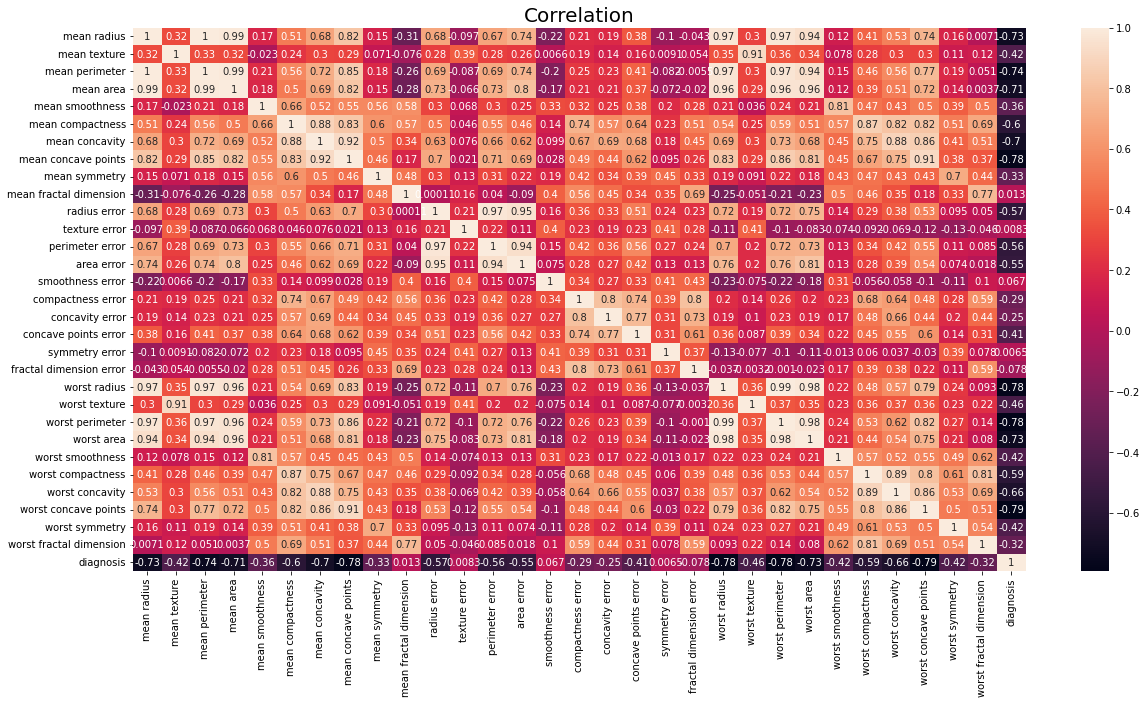

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

data.corr()
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(), annot=True)
plt.title("Correlation", fontsize=20)
plt.show()

<h4>> Checking Label (Diagnosis) Distribution

In [7]:
data["diagnosis"].value_counts()

1    357
0    212
Name: diagnosis, dtype: int64

C:\Users\LENOVO\anaconda3\envs\klasa-env\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


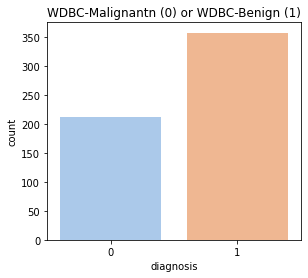

In [8]:
plt.rcParams["figure.figsize"] = (10,4)
plt.subplot(1,2,1)
sns.countplot(data["diagnosis"], palette='pastel')
plt.title("WDBC-Malignantn (0) or WDBC-Benign (1)", fontsize=12)
plt.show()

**0** value refers to WDBC-Malignantn, and
**1** value refers to WDBC-Benign

<h3>Data Pre-processing: Missing Values and Outliers

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

Similar to Data Description, there is no missing values

<AxesSubplot:>

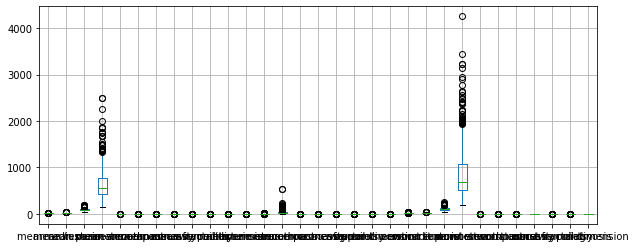

In [10]:
data.boxplot()

In [11]:
data_newr = data.copy() 

# Looping for determining Q1, Q3, IQR and Removing outliers
for column in data_newr.columns:
    Q1 = data_newr[column].quantile(0.25)
    Q3 = data_newr[column].quantile(0.75)
    IQR = Q3 - Q1
    data_newr = data_newr[~((data_newr[column] < (Q1 - 1.5*IQR)) | (data_newr[column] > (Q3 + 1.5*IQR)))]
    
# Check ukuran (baris dan kolom) sebelum dan setelah data yang outliers dibuang
print('Old Shape: ', data.shape)
print('New Shape: ', data_newr.shape)
print('Number of Outliers: ', data.shape[0] - data_newr.shape[0])
print('Percentage of Removed Data:', "{:.2%}".format((data.shape[0] - data_newr.shape[0])/data.shape[0]))

Old Shape:  (569, 31)
New Shape:  (255, 31)
Number of Outliers:  314
Percentage of Removed Data: 55.18%


Because, If we removed ooutlier data (with IQR approach), We would lose 55.18% of data. So, in this case, **we let them**

<h3>Data Pre-processing: <b>Scaling

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler() #Define
#apply fit_transform to scale
scaled_data = scaler.fit_transform(data.loc[:, data.columns != "diagnosis"])
scaled_data = pd.DataFrame(scaled_data, columns=data_cancer.feature_names)
scaled_data["diagnosis"] = data["diagnosis"]
#checking min and max value of the scaling column
scaled_data.describe().T[['min','max']].transpose()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
min,-2.029648,-2.229249,-1.984504,-1.454443,-3.112085,-1.610136,-1.114873,-1.26182,-2.744117,-1.819865,...,-2.223994,-1.693361,-1.222423,-2.682695,-1.443878,-1.305831,-1.745063,-2.160960,-1.601839,0.0
max,3.971288,4.651889,3.976130,5.250529,4.770911,4.568425,4.243589,3.92793,4.484751,4.910919,...,3.885905,4.287337,5.930172,3.955374,5.112877,4.700669,2.685877,6.046041,6.846856,1.0


# k-Means Clustering towards the Dataset

<h3>Determine optimum K-value with Elbow Method

In [13]:
from sklearn.cluster import KMeans

# Data features
X = scaled_data.loc[:, data.columns != "diagnosis"]

# make list containing inertia
distortions = []
for i in range(1,11):
    kmeans_model = KMeans(n_clusters=i).fit(X)
    distortions.append(kmeans_model.inertia_)

Text(0, 0.5, 'Inertia')

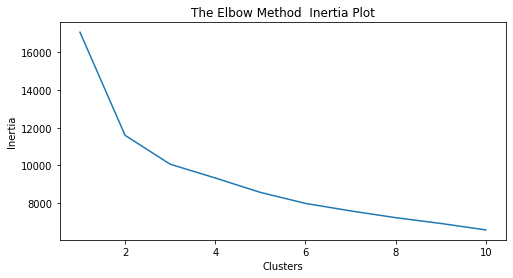

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# membuat plot inertia
plt.figure(figsize=(8,4))
plt.plot(range(1,11), distortions)
plt.title('The Elbow Method  Inertia Plot')
plt.xlabel('Clusters')
plt.ylabel('Inertia')

From the above plotting, selected **K value is 2**

<h3> KMeans Clustering

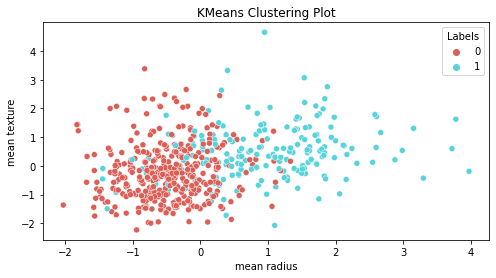

Wall time: 708 ms


In [15]:
%%time

# make KMeans object
kmeans_model2 = KMeans(n_clusters=2).fit(X)

# menambahkan kolom label pada dataset
X['Labels'] = kmeans_model2.predict(X)

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['mean radius'], y=X['mean texture'], hue=X['Labels'],
                palette=sns.color_palette('hls',2))
plt.title('KMeans Clustering Plot')
plt.show()

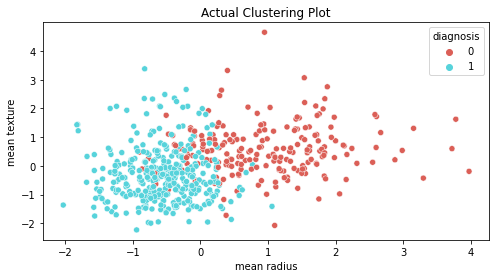

Wall time: 648 ms


In [16]:
%%time

# membuat plot KMeans dengan 5 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=X['mean radius'], y=X['mean texture'], hue=data['diagnosis'],
                palette=sns.color_palette('hls',2))
plt.title('Actual Clustering Plot')
plt.show()

Actual Clustering and KMeans Clustering are not too different. If you are scrupulous, you can figure out there is different between -1 and -2 in x axis.

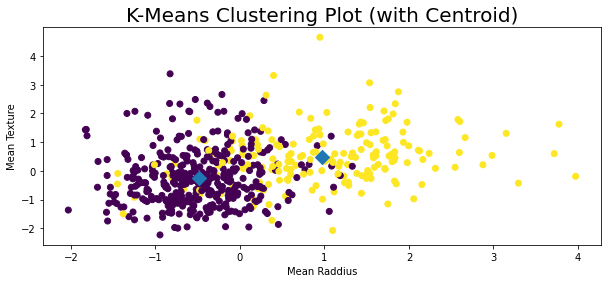

In [17]:
# Make a scatter plot of xs and ys, using labels to define the colors 
plt.scatter(x=X['mean radius'], y=X['mean texture'], c=X['Labels']) 
# Assign the cluster centers: centroids 
centroids = kmeans_model2.cluster_centers_ 
# Assign the columns of centroids: centroids_x, centroids_y 
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=100) 
plt.title('K-Means Clustering Plot (with Centroid)', fontsize = 20) 
plt.xlabel('Mean Raddius')
plt.ylabel('Mean Texture')
plt.show()

<h3>> Evaluation of Clustering - Adjusted Rand Index (ARI)

In [18]:
from sklearn.metrics import adjusted_rand_score

adjusted_rand_score(data["diagnosis"], X['Labels'])

0.6707206476880808

# k-Means Clustering for n Principal Components

PCA is used to decompose a multivariate dataset in a set of successive orthogonal components that explain a maximum amount of the variance (reference: https://scikit-learn.org/stable/modules/decomposition.html#pca)

In [19]:
# Running PCA
from sklearn.decomposition import PCA
# Let's say, components = 10
pca = PCA(n_components=10)
pca.fit(X)

PCA(n_components=10)

In [20]:
for i in range(1,11):
    print("Explained variance ratio with n =", i, "is",  pca.explained_variance_ratio_[:i].sum())

Explained variance ratio with n = 1 is 0.44479994879668194
Explained variance ratio with n = 2 is 0.6331201678612297
Explained variance ratio with n = 3 is 0.7264031220987807
Explained variance ratio with n = 4 is 0.7919490847004315
Explained variance ratio with n = 5 is 0.8465033768938443
Explained variance ratio with n = 6 is 0.8864536189288679
Explained variance ratio with n = 7 is 0.9088068231436892
Explained variance ratio with n = 8 is 0.9245789816419144
Explained variance ratio with n = 9 is 0.9383744412298667
Explained variance ratio with n = 10 is 0.9499794672577668


Text(0, 0.5, 'Cumulative of Proportion of Variance Explained')

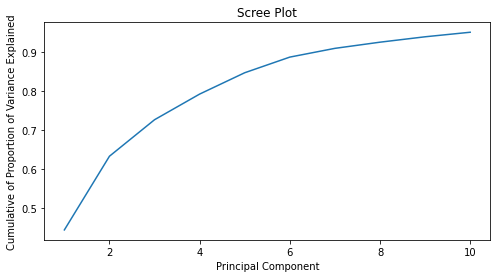

In [21]:
import numpy as np

plt.figure(figsize=(8,4))
plt.plot(range(1,11), np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative of Proportion of Variance Explained')

Because explained variance ratio has been > 0.9 with n = 7. so **selected n_components is 7**

In [22]:
pca = PCA(n_components=7)
pca.fit(X)
x_pca = pca.transform(X)
df_pca = pd.DataFrame(data=x_pca, columns=["PC_01", "PC_02", "PC_03", "PC_04","PC_05", "PC_06", "PC_07"])
df_pca.head()

,PC_01,PC_02,PC_03,PC_04,PC_05,PC_06,PC_07
0,9.209944,1.950974,-1.107875,3.640711,-1.195083,1.410001,2.167327
1,2.447653,-3.768637,-0.535459,1.114265,0.621736,0.030041,0.002470
2,5.772997,-1.074246,-0.548370,0.913251,-0.177086,0.541448,-0.668058
3,7.153342,10.276945,-3.226114,0.157770,-2.960848,3.052385,1.434317
4,3.983858,-1.947782,1.388658,2.937277,0.546706,-1.225265,-0.944077


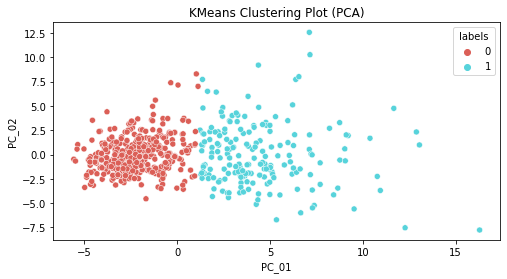

Wall time: 618 ms


In [23]:
%%time

# make KMeans object
kmeans_model = KMeans(n_clusters=2).fit(df_pca)

# menambahkan kolom label pada dataset
df_pca['labels'] = kmeans_model.predict(df_pca)

# membuat plot KMeans dengan 2 klaster
plt.figure(figsize=(8,4))
sns.scatterplot(x=df_pca["PC_01"], y=df_pca["PC_02"], hue=df_pca['labels'],
                palette=sns.color_palette('hls',2))
plt.title('KMeans Clustering Plot (PCA)')
plt.show()

you can figure out KMeans Clustering for n Principal Components is better than before

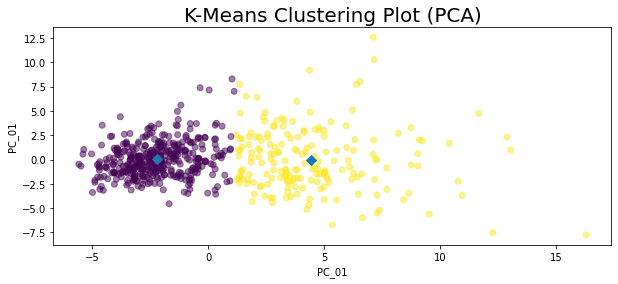

In [24]:
# Make a scatter plot of xs and ys, using labels to define the colors 
plt.scatter(x=df_pca["PC_01"], y=df_pca["PC_02"], c=df_pca['labels'], alpha=0.5) 
# Assign the cluster centers: centroids 
centroids = kmeans_model.cluster_centers_ 
# Assign the columns of centroids: centroids_x, centroids_y 
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]
# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x, centroids_y, marker='D', s=50) 
plt.title('K-Means Clustering Plot (PCA)', fontsize = 20) 
plt.xlabel("PC_01") 
plt.ylabel("PC_01") 
plt.show()

<h3>> Evaluation of Clustering (PCA) - Adjusted Rand Index

In [25]:
adjusted_rand_score(data["diagnosis"], df_pca["labels"])

0.6707206476880808

<h3>Show the Time Computation

In [26]:
# now we have initialized the variable
# end to store the ending time after
# execution of program
end = time.time()
 
# difference of start and end variables
# gives the time of execution of the
# program in between
print("The time of execution of above program is", "{:.2f}".format(end-start), "seconds")

The time of execution of above program is 24.75 seconds
